# DataFreame载入及空值填充

In [2]:
import os
import pandas as pd
import numpy as np


df = pd.read_csv(
    "https://data.heatonresearch.com/data/t81-558/auto-mpg.csv", 
    na_values=['NA', '?'])
print(f"horsepower has na? {pd.isnull(df['horsepower']).values.any()}")
    
print("Filling missing values...")
med = df['horsepower'].median()
df['horsepower'] = df['horsepower'].fillna(med)
                
print(f"horsepower has na? {pd.isnull(df['horsepower']).values.any()}")
display(df)

horsepower has na? True
Filling missing values...
horsepower has na? False


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,1,ford ranger


# 特征直方图


<Figure size 432x288 with 0 Axes>

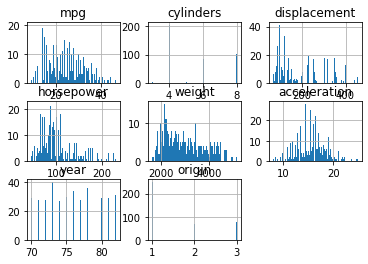

<Figure size 432x288 with 0 Axes>

In [3]:
import matplotlib.pyplot as plt

df.hist(bins=100)
plt.figure()

# 特征归一化示例
### weight特征
#### zscore
#### minimax
#### percentile

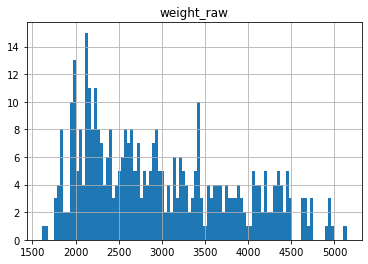

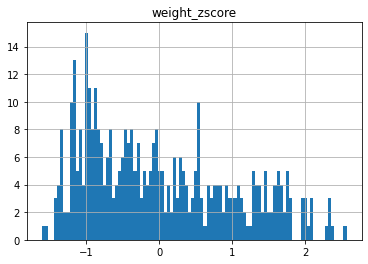

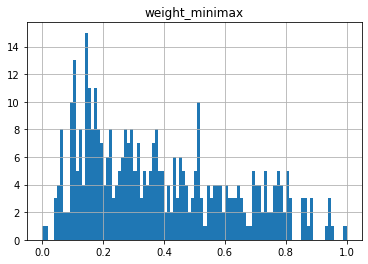

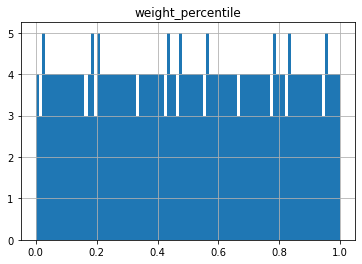

<Figure size 432x288 with 0 Axes>

In [4]:

import pandas as pd
from scipy.stats import zscore
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

plt.title("weight_raw")
df['weight'].hist(bins=100)
plt.figure()

df['weight_zscore'] = zscore(df['weight'])
plt.title("weight_zscore")
df['weight_zscore'].hist(bins=100)
plt.figure()

scaler = MinMaxScaler()
df['weight_minimax']=scaler.fit_transform(df['weight'].values.reshape(-1,1))
plt.title("weight_minimax")
df['weight_minimax'].hist(bins=100)
plt.figure()

def percentile(df,column):
    sz = df[column].size-1
    df[column+'_percentile'] = df[column].rank(method='max').apply(lambda x: (x-1)/sz)

percentile(df,'weight')
plt.title("weight_percentile")
df['weight_percentile'].hist(bins=100)
plt.figure()

percentile(df,'cylinders')
percentile(df,'displacement')
percentile(df,'horsepower')
percentile(df,'acceleration')
percentile(df,'year')


# 分位数归一化线性特征

In [5]:
percentile(df,'cylinders')
percentile(df,'displacement')
percentile(df,'horsepower')
percentile(df,'acceleration')
percentile(df,'year')

display(df)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,weight_zscore,weight_minimax,weight_percentile,cylinders_percentile,displacement_percentile,horsepower_percentile,acceleration_percentile,year_percentile
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu,0.630870,0.536150,0.727960,1.000000,0.816121,0.770781,0.100756,0.070529
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320,0.854333,0.589736,0.775819,1.000000,0.906801,0.916877,0.073048,0.070529
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite,0.550470,0.516870,0.712846,1.000000,0.858942,0.886650,0.042821,0.070529
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst,0.546923,0.516019,0.710327,1.000000,0.798489,0.886650,0.100756,0.070529
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino,0.565841,0.520556,0.720403,1.000000,0.780856,0.806045,0.025189,0.070529
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,1,ford mustang gl,-0.213324,0.333711,0.493703,0.521411,0.481108,0.365239,0.539043,1.000000
394,44.0,4,97.0,52.0,2130,24.6,82,2,vw pickup,-0.993671,0.146583,0.186398,0.521411,0.193955,0.022670,0.997481,1.000000
395,32.0,4,135.0,84.0,2295,11.6,82,1,dodge rampage,-0.798585,0.193365,0.292191,0.521411,0.440806,0.329975,0.075567,1.000000
396,28.0,4,120.0,79.0,2625,18.6,82,1,ford ranger,-0.408411,0.286929,0.423174,0.521411,0.367758,0.279597,0.866499,1.000000


# 独热编码非线性特征
### origin字段 独热编码
### name字段 对首单词独热编码

In [6]:
from sklearn import metrics
from scipy.stats import zscore


def get_first_word(x):
    words = x.split()
    return words[0]

dummies = pd.get_dummies(df['origin'],prefix='origin')
df = pd.concat([df,dummies],axis=1)
df.drop('origin',axis=1, inplace=True)
display(df)


df['name']=df['name'].apply(get_first_word)
dummies = pd.get_dummies(df['name'],prefix='name')
df = pd.concat([df,dummies],axis=1)
df.drop('name',axis=1, inplace=True)
display(df)


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,name,weight_zscore,weight_minimax,weight_percentile,cylinders_percentile,displacement_percentile,horsepower_percentile,acceleration_percentile,year_percentile,origin_1,origin_2,origin_3
0,18.0,8,307.0,130.0,3504,12.0,70,chevrolet chevelle malibu,0.630870,0.536150,0.727960,1.000000,0.816121,0.770781,0.100756,0.070529,1,0,0
1,15.0,8,350.0,165.0,3693,11.5,70,buick skylark 320,0.854333,0.589736,0.775819,1.000000,0.906801,0.916877,0.073048,0.070529,1,0,0
2,18.0,8,318.0,150.0,3436,11.0,70,plymouth satellite,0.550470,0.516870,0.712846,1.000000,0.858942,0.886650,0.042821,0.070529,1,0,0
3,16.0,8,304.0,150.0,3433,12.0,70,amc rebel sst,0.546923,0.516019,0.710327,1.000000,0.798489,0.886650,0.100756,0.070529,1,0,0
4,17.0,8,302.0,140.0,3449,10.5,70,ford torino,0.565841,0.520556,0.720403,1.000000,0.780856,0.806045,0.025189,0.070529,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,ford mustang gl,-0.213324,0.333711,0.493703,0.521411,0.481108,0.365239,0.539043,1.000000,1,0,0
394,44.0,4,97.0,52.0,2130,24.6,82,vw pickup,-0.993671,0.146583,0.186398,0.521411,0.193955,0.022670,0.997481,1.000000,0,1,0
395,32.0,4,135.0,84.0,2295,11.6,82,dodge rampage,-0.798585,0.193365,0.292191,0.521411,0.440806,0.329975,0.075567,1.000000,1,0,0
396,28.0,4,120.0,79.0,2625,18.6,82,ford ranger,-0.408411,0.286929,0.423174,0.521411,0.367758,0.279597,0.866499,1.000000,1,0,0


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,weight_zscore,weight_minimax,weight_percentile,...,name_renault,name_saab,name_subaru,name_toyota,name_toyouta,name_triumph,name_vokswagen,name_volkswagen,name_volvo,name_vw
0,18.0,8,307.0,130.0,3504,12.0,70,0.630870,0.536150,0.727960,...,0,0,0,0,0,0,0,0,0,0
1,15.0,8,350.0,165.0,3693,11.5,70,0.854333,0.589736,0.775819,...,0,0,0,0,0,0,0,0,0,0
2,18.0,8,318.0,150.0,3436,11.0,70,0.550470,0.516870,0.712846,...,0,0,0,0,0,0,0,0,0,0
3,16.0,8,304.0,150.0,3433,12.0,70,0.546923,0.516019,0.710327,...,0,0,0,0,0,0,0,0,0,0
4,17.0,8,302.0,140.0,3449,10.5,70,0.565841,0.520556,0.720403,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,-0.213324,0.333711,0.493703,...,0,0,0,0,0,0,0,0,0,0
394,44.0,4,97.0,52.0,2130,24.6,82,-0.993671,0.146583,0.186398,...,0,0,0,0,0,0,0,0,0,1
395,32.0,4,135.0,84.0,2295,11.6,82,-0.798585,0.193365,0.292191,...,0,0,0,0,0,0,0,0,0,0
396,28.0,4,120.0,79.0,2625,18.6,82,-0.408411,0.286929,0.423174,...,0,0,0,0,0,0,0,0,0,0


# mpg作为label 其他作为特征

In [7]:

x=df.drop('mpg',axis=1)
print("x.shape=",x.shape)

y=df['mpg']
print("y.shape=",y.shape)

feature_ratings = pd.DataFrame(columns=x.columns)



x.shape= (398, 54)
y.shape= (398,)


# KBest特征评分
## f_regression
    F-value between label/feature for regression tasks
## mutual_info_regression
    Mutual information for a continuous target.
## f_classif
    ANOVA F-value between label/feature for classification tasks.


In [8]:

from sklearn.feature_selection import SelectKBest, chi2,f_regression,mutual_info_regression,f_classif

fr = SelectKBest(f_regression,k='all').fit(x, y)
mir = SelectKBest(mutual_info_regression,k='all').fit(x, y)
f_classif = SelectKBest(f_classif,k='all').fit(x, y)

feature_ratings.loc['fr_score'] = fr.scores_
feature_ratings.loc['mir_score'] = mir.scores_
feature_ratings.loc['f_classif_score'] = f_classif.scores_

display(feature_ratings)

/Users/thomashuang/opt/miniconda3/envs/tensorflow/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:116: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw


,cylinders,displacement,horsepower,weight,acceleration,year,weight_zscore,weight_minimax,weight_percentile,cylinders_percentile,...,name_renault,name_saab,name_subaru,name_toyota,name_toyouta,name_triumph,name_vokswagen,name_volkswagen,name_volvo,name_vw
fr_score,597.077048,724.994303,589.638205,888.850683,84.957700,199.982008,888.850683,888.850683,1003.401172,452.007853,...,7.387202,0.009801,3.269217,10.550760,0.004334,2.171195,0.647753,8.122307,0.572767,25.439362
mir_score,0.608250,0.809731,0.715762,0.775840,0.178895,0.327861,0.775134,0.776044,0.771587,0.612789,...,0.000000,0.013100,0.000000,0.055217,0.000000,0.041995,0.000000,0.014789,0.000000,0.037343
f_classif_score,12.140920,12.960087,8.934822,14.871390,1.946966,3.713601,14.871390,14.871390,13.710749,8.820703,...,1.191514,1.167702,2.558626,1.436349,0.227640,2.091002,2.091002,0.799921,0.655904,12.091905


# RFE 迭代式的特征淘汰 (Recursive Feature Elimination)

### SVR
    Epsilon-Support Vector Regression.
### NuSVR
    Nu Support Vector Regression.

In [9]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVR, NuSVR

estimator_svr = SVR(kernel="linear")
selector_svr = RFE(estimator_svr, n_features_to_select=0.1, step=0.1)
rfe_svr = selector_svr.fit(x, y)
print(rfe_svr.support_)
print(rfe_svr.ranking_)

estimator_nusvr = NuSVR(kernel="linear")
selector_nusvr = RFE(estimator_nusvr, n_features_to_select=0.1, step=0.1)
rfe_nusvr = selector_nusvr.fit(x, y)
print(rfe_nusvr.support_)
print(rfe_nusvr.ranking_)


feature_ratings.loc['rfe_svr_ranking'] = rfe_svr.ranking_
feature_ratings.loc['rfe_nusvr_ranking'] = rfe_nusvr.ranking_
display(feature_ratings)

[False False False False False False False False  True  True  True  True
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False  True False False]
[ 5 10  9 10  8  5 10 11  1  1  1  1  2  7  4  6  7  7  8 11  7 11  8  6
  8  6  9  2 10  8  4  9  5  5 10  6 11  3  4  5  2  9  6  3  3 11  9  7
  3  4  4  1  3  2]
[False False False False False False False False  True False  True  True
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False  True False  True]
[ 4  7  7  7  5  4  7  7  1  2  1  1  5  6  3  5  5  5  8 10  6 10 11 11
  9  9  4  3 10  6  4  8  9  3 10  6 11  3  3  9  2  9  4  2 11  6  8 10
  8  8 11  1  2  1]


,cylinders,displacement,horsepower,weight,acceleration,year,weight_zscore,weight_minimax,weight_percentile,cylinders_percentile,...,name_renault,name_saab,name_subaru,name_toyota,name_toyouta,name_triumph,name_vokswagen,name_volkswagen,name_volvo,name_vw
fr_score,597.077048,724.994303,589.638205,888.850683,84.957700,199.982008,888.850683,888.850683,1003.401172,452.007853,...,7.387202,0.009801,3.269217,10.550760,0.004334,2.171195,0.647753,8.122307,0.572767,25.439362
mir_score,0.608250,0.809731,0.715762,0.775840,0.178895,0.327861,0.775134,0.776044,0.771587,0.612789,...,0.000000,0.013100,0.000000,0.055217,0.000000,0.041995,0.000000,0.014789,0.000000,0.037343
f_classif_score,12.140920,12.960087,8.934822,14.871390,1.946966,3.713601,14.871390,14.871390,13.710749,8.820703,...,1.191514,1.167702,2.558626,1.436349,0.227640,2.091002,2.091002,0.799921,0.655904,12.091905
rfe_svr_ranking,5.000000,10.000000,9.000000,10.000000,8.000000,5.000000,10.000000,11.000000,1.000000,1.000000,...,3.000000,11.000000,9.000000,7.000000,3.000000,4.000000,4.000000,1.000000,3.000000,2.000000
rfe_nusvr_ranking,4.000000,7.000000,7.000000,7.000000,5.000000,4.000000,7.000000,7.000000,1.000000,2.000000,...,11.000000,6.000000,8.000000,10.000000,8.000000,8.000000,11.000000,1.000000,2.000000,1.000000


# 使用模型对特征评分
### LinearRegression
    特征的相关性 coef
### AdaBoostRegressor
    特征重要性 feature_importance
### RandomForestRegressor
    特征重要性 feature_importance
### GradientBoostingRegressor
    特征重要性 feature_importance

In [10]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

selector_model_lr = SelectFromModel(estimator=LinearRegression()).fit(x, y)
selector_model_ada_boost = SelectFromModel(estimator=AdaBoostRegressor()).fit(x, y)
selector_model_random_forest = SelectFromModel(estimator=RandomForestRegressor()).fit(x, y)
selector_model_brandient_boost = SelectFromModel(estimator=GradientBoostingRegressor()).fit(x, y)

feature_ratings.loc['select_model_lr_coef'] = selector_model_lr.estimator_.coef_
feature_ratings.loc['selector_model_ada_boost'] = selector_model_ada_boost.estimator_.feature_importances_
feature_ratings.loc['selector_model_random_forest'] = selector_model_random_forest.estimator_.feature_importances_
feature_ratings.loc['selector_model_brandient_boost'] = selector_model_brandient_boost.estimator_.feature_importances_

display(feature_ratings)

,cylinders,displacement,horsepower,weight,acceleration,year,weight_zscore,weight_minimax,weight_percentile,cylinders_percentile,...,name_renault,name_saab,name_subaru,name_toyota,name_toyouta,name_triumph,name_vokswagen,name_volkswagen,name_volvo,name_vw
fr_score,597.077048,724.994303,589.638205,888.850683,84.957700,199.982008,888.850683,8.888507e+02,1003.401172,452.007853,...,7.387202,0.009801,3.269217,10.550760,0.004334,2.171195,0.647753,8.122307,0.572767,25.439362
mir_score,0.608250,0.809731,0.715762,0.775840,0.178895,0.327861,0.775134,7.760443e-01,0.771587,0.612789,...,0.000000,0.013100,0.000000,0.055217,0.000000,0.041995,0.000000,0.014789,0.000000,0.037343
f_classif_score,12.140920,12.960087,8.934822,14.871390,1.946966,3.713601,14.871390,1.487139e+01,13.710749,8.820703,...,1.191514,1.167702,2.558626,1.436349,0.227640,2.091002,2.091002,0.799921,0.655904,12.091905
rfe_svr_ranking,5.000000,10.000000,9.000000,10.000000,8.000000,5.000000,10.000000,1.100000e+01,1.000000,1.000000,...,3.000000,11.000000,9.000000,7.000000,3.000000,4.000000,4.000000,1.000000,3.000000,2.000000
rfe_nusvr_ranking,4.000000,7.000000,7.000000,7.000000,5.000000,4.000000,7.000000,7.000000e+00,1.000000,2.000000,...,11.000000,6.000000,8.000000,10.000000,8.000000,8.000000,11.000000,1.000000,2.000000,1.000000
select_model_lr_coef,-2.288612,0.022203,0.004973,-0.000855,0.195220,6.236638,-0.000001,-2.423720e-07,-10.609413,16.333266,...,1.098538,1.404850,-1.290361,-0.280654,-0.541447,5.206797,-8.187099,-3.077183,-1.065067,3.740120
selector_model_ada_boost,0.001517,0.075528,0.095843,0.101309,0.024724,0.088477,0.080319,6.243232e-02,0.094403,0.009615,...,0.001772,0.000000,0.000000,0.000000,0.000000,0.000000,0.009133,0.000000,0.000551,0.006147
selector_model_random_forest,0.077406,0.140137,0.054047,0.066549,0.012379,0.055954,0.068376,4.628709e-02,0.072626,0.119113,...,0.000241,0.000090,0.000252,0.000666,0.000015,0.000180,0.000700,0.000809,0.000298,0.001940
selector_model_brandient_boost,0.169833,0.124639,0.036790,0.022981,0.006957,0.071499,0.099907,1.740367e-01,0.076485,0.003261,...,0.000192,0.000090,0.000319,0.000000,0.000000,0.000547,0.001663,0.000553,0.000138,0.002567


# 特征评分归一化(未完成)

In [11]:
def percentile_row(df,index):
    sz = df.loc[index].size-1
    df.loc[index+'_percentile'] = df.loc[index].rank(method='min').apply(lambda x: 100*(x-1)/sz)

percentile_row(feature_ratings,'fr_score')
percentile_row(feature_ratings,'mir_score')
percentile_row(feature_ratings,'f_classif_score')
percentile_row(feature_ratings,'rfe_svr_ranking')
percentile_row(feature_ratings,'rfe_nusvr_ranking')
percentile_row(feature_ratings,'select_model_lr_coef')
percentile_row(feature_ratings,'selector_model_ada_boost')
percentile_row(feature_ratings,'selector_model_random_forest')
percentile_row(feature_ratings,'selector_model_brandient_boost')

display(feature_ratings)

,cylinders,displacement,horsepower,weight,acceleration,year,weight_zscore,weight_minimax,weight_percentile,cylinders_percentile,...,name_renault,name_saab,name_subaru,name_toyota,name_toyouta,name_triumph,name_vokswagen,name_volkswagen,name_volvo,name_vw
fr_score,597.077048,724.994303,589.638205,888.850683,84.957700,199.982008,888.850683,8.888507e+02,1003.401172,452.007853,...,7.387202,0.009801,3.269217,10.550760,0.004334,2.171195,0.647753,8.122307,0.572767,25.439362
mir_score,0.608250,0.809731,0.715762,0.775840,0.178895,0.327861,0.775134,7.760443e-01,0.771587,0.612789,...,0.000000,0.013100,0.000000,0.055217,0.000000,0.041995,0.000000,0.014789,0.000000,0.037343
f_classif_score,12.140920,12.960087,8.934822,14.871390,1.946966,3.713601,14.871390,1.487139e+01,13.710749,8.820703,...,1.191514,1.167702,2.558626,1.436349,0.227640,2.091002,2.091002,0.799921,0.655904,12.091905
rfe_svr_ranking,5.000000,10.000000,9.000000,10.000000,8.000000,5.000000,10.000000,1.100000e+01,1.000000,1.000000,...,3.000000,11.000000,9.000000,7.000000,3.000000,4.000000,4.000000,1.000000,3.000000,2.000000
rfe_nusvr_ranking,4.000000,7.000000,7.000000,7.000000,5.000000,4.000000,7.000000,7.000000e+00,1.000000,2.000000,...,11.000000,6.000000,8.000000,10.000000,8.000000,8.000000,11.000000,1.000000,2.000000,1.000000
select_model_lr_coef,-2.288612,0.022203,0.004973,-0.000855,0.195220,6.236638,-0.000001,-2.423720e-07,-10.609413,16.333266,...,1.098538,1.404850,-1.290361,-0.280654,-0.541447,5.206797,-8.187099,-3.077183,-1.065067,3.740120
selector_model_ada_boost,0.001517,0.075528,0.095843,0.101309,0.024724,0.088477,0.080319,6.243232e-02,0.094403,0.009615,...,0.001772,0.000000,0.000000,0.000000,0.000000,0.000000,0.009133,0.000000,0.000551,0.006147
selector_model_random_forest,0.077406,0.140137,0.054047,0.066549,0.012379,0.055954,0.068376,4.628709e-02,0.072626,0.119113,...,0.000241,0.000090,0.000252,0.000666,0.000015,0.000180,0.000700,0.000809,0.000298,0.001940
selector_model_brandient_boost,0.169833,0.124639,0.036790,0.022981,0.006957,0.071499,0.099907,1.740367e-01,0.076485,0.003261,...,0.000192,0.000090,0.000319,0.000000,0.000000,0.000547,0.001663,0.000553,0.000138,0.002567
fr_score_percentile,86.792453,88.679245,84.905660,98.113208,73.584906,81.132075,96.226415,9.433962e+01,100.000000,83.018868,...,50.943396,7.547170,37.735849,58.490566,5.660377,33.962264,20.754717,54.716981,18.867925,67.924528


# 交叉验证-训练集/测试集划分

In [20]:
from sklearn.model_selection import train_test_split
# Convert to numpy - Classification
x_columns = df.columns.drop('mpg')
x = df[x_columns].values
y = df['mpg'].values
print("df.shape=",df.shape)
print("x.shape=",x.shape)
print("y.shape=",y.shape)
# Create train/test
x_train, x_test, y_train, y_test = train_test_split(    
    x, y, test_size=0.25, random_state=42)
print("x_train.shape=",x_train.shape)
print("x_test.shape=",x_test.shape)

df.shape= (398, 55)
x.shape= (398, 54)
y.shape= (398,)
x_train.shape= (298, 54)
x_test.shape= (100, 54)


# Tensorflow模型拟合
### 多层感知机 55-25-10-1 
### 激活函数 Relu
### 损失函数 MSE均方误差和
### 优化函数 adam
### EarlyStopping

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping

# Build the neural network
model = Sequential()
model.add(Dense(25, input_dim=x.shape[1], activation='relu')) # Hidden 1
model.add(Dense(10, activation='relu')) # Hidden 2
model.add(Dense(1)) # Output
model.compile(loss='mean_squared_error', optimizer='adam')
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, 
                        patience=5, verbose=1, mode='auto', 
                        restore_best_weights=True)
model.fit(x_train,y_train,validation_data=(x_test,y_test),
          callbacks=[monitor],verbose=2,epochs=1000)

# 测试集MSE

In [14]:
from sklearn import metrics

# Predict
pred = model.predict(x_test)

# Measure MSE error.  
score = metrics.mean_squared_error(pred,y_test)
print("Final score (MSE): {}".format(score))

Final score (MSE): 13.171755078634737


# 测试接RMSE

In [15]:
import numpy as np

# Measure RMSE error.  RMSE is common for regression.
score = np.sqrt(metrics.mean_squared_error(pred,y_test))
print("Final score (RMSE): {}".format(score))

Final score (RMSE): 3.629291263957019


# Lift Chart

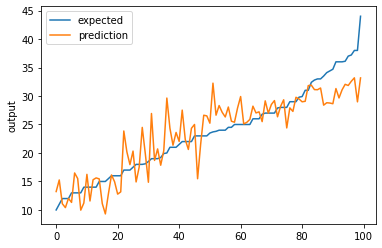

<Figure size 432x288 with 0 Axes>

In [19]:
# Regression chart.
def chart_regression(pred, y, sort=True):
    t = pd.DataFrame({'pred': pred, 'y': y.flatten()})
    if sort:
        t.sort_values(by=['y'], inplace=True)
    plt.plot(t['y'].tolist(), label='expected')
    plt.plot(t['pred'].tolist(), label='prediction')
    plt.ylabel('output')
    plt.legend()
    plt.figure()


# Plot the chart
chart_regression(pred.flatten(),y_test)